In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [ ]:
train_df = pd.read_csv('/content/train_cleaned.csv')
val_df = pd.read_csv('/content/test_cleaned.csv')
test_df = pd.read_csv('/content/val_cleaned.csv')

# Kiểm tra dữ liệu
print(train_df.head())

                                            comments  label  \
0  quá đẹp đã mua 2 lần chỗ shop rất ưng nha mọi ...      0   
1  chất lượng sản phẩm tuyệt vời giao hàng nhanh ...      0   
2  giao hàng nhanh đống gói cực đẹp mua shop mail...      0   
3  mức giá sinh viên chất lượng quá tốt mình từng...      0   
4                   màu lên cực đẹp mùi thơm như kẹo      0   

                                    comments_cleaned  
0                   đẹp mua 2 chỗ shop ưng nha mua 💚  
1  chất_lượng sản_phẩm tuyệt_vời giao hàng đóng_g...  
2  giao hàng đống gói cực đẹp mua shop mail bao_g...  
3  giá sinh_viên chất_lượng màu 12 13 14 ver 3 mà...  
4                           màu cực đẹp mùi thơm kẹo  


In [ ]:
print('Dataset information:')
print(f'Training data: {train_df.shape}')
print(f'Validation data: {val_df.shape}')
print(f'Test data: {test_df.shape}')

Dataset information:
Training data: (9767, 3)
Validation data: (1246, 3)
Test data: (1245, 3)


In [ ]:
LABELS_MAPPING = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}


In [ ]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Chuyển thành chữ thường
        text = emoji.replace_emoji(text, replace="")  # Loại bỏ emoji
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Loại bỏ ký tự đặc biệt
        text = re.sub(r'\s+', ' ', text).strip()  # Xóa khoảng trắng thừa
    else:
        text = ""
    return text



<ipython-input-73-911a41deeddf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'].map(LABELS_MAPPING), palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


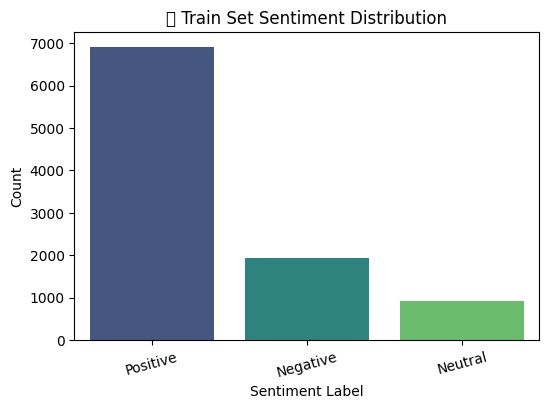

<ipython-input-73-911a41deeddf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'].map(LABELS_MAPPING), palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


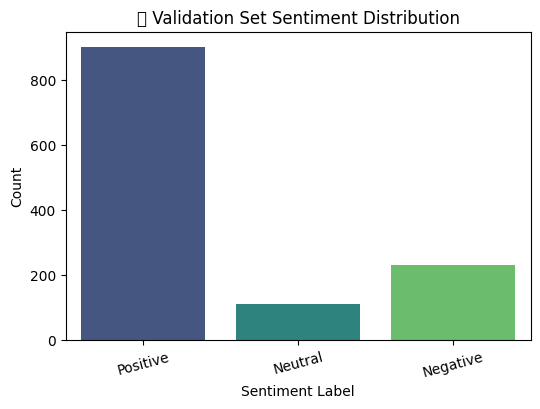

<ipython-input-73-911a41deeddf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'].map(LABELS_MAPPING), palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


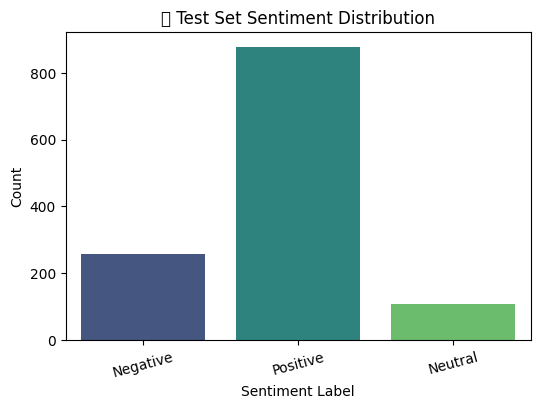

In [ ]:
def plot_label_distribution(df, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['label'].map(LABELS_MAPPING), palette='viridis')
    plt.title(title)
    plt.xlabel("Sentiment Label")
    plt.ylabel("Count")
    plt.xticks(rotation=15)
    plt.show()

plot_label_distribution(train_df, "📊 Train Set Sentiment Distribution")
plot_label_distribution(val_df, "📊 Validation Set Sentiment Distribution")
plot_label_distribution(test_df, "📊 Test Set Sentiment Distribution")


In [ ]:
X_train, y_train = train_df['comments'], train_df['label']
X_val, y_val = val_df['comments'], val_df['label']
X_test, y_test = test_df['comments'], test_df['label']

In [ ]:
X_train = X_train.fillna('').apply(clean_text)
X_val = X_val.fillna('').apply(clean_text)
X_test = X_test.fillna('').apply(clean_text)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

#svm



🎯 SVM Validation Accuracy: 0.841091492776886
🎯 SVM Test Accuracy: 0.8497991967871485

📊 SVM Classification Report:
              precision    recall  f1-score   support

    Positive       0.88      0.96      0.91       878
    Negative       0.79      0.77      0.78       258
     Neutral       0.54      0.18      0.27       109

    accuracy                           0.85      1245
   macro avg       0.74      0.64      0.66      1245
weighted avg       0.83      0.85      0.83      1245



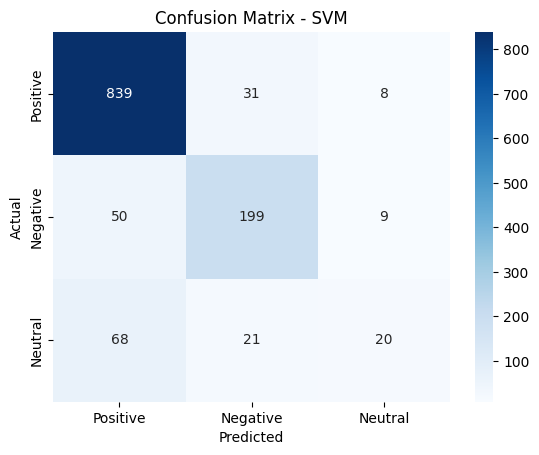

In [ ]:
# 🚀 Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# 🚀 Dự đoán
y_val_pred_svm = svm_model.predict(X_val_tfidf)
y_test_pred_svm = svm_model.predict(X_test_tfidf)

# 🚀 Đánh giá mô hình SVM
print("\n🎯 SVM Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("🎯 SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("\n📊 SVM Classification Report:")
print(classification_report(y_test, y_test_pred_svm, target_names=LABELS_MAPPING.values()))

# 🚀 Confusion Matrix cho SVM
svm_cm = confusion_matrix(y_test, y_test_pred_svm, labels=[0, 1, 2])
sns.heatmap(svm_cm, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS_MAPPING.values(), yticklabels=LABELS_MAPPING.values())
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#NV


🎯 Naïve Bayes Validation Accuracy: 0.7969502407704655
🎯 Naïve Bayes Test Accuracy: 0.8016064257028113

📊 Naïve Bayes Classification Report:
              precision    recall  f1-score   support

    Positive       0.79      0.99      0.88       878
    Negative       0.88      0.50      0.64       258
     Neutral       0.00      0.00      0.00       109

    accuracy                           0.80      1245
   macro avg       0.56      0.50      0.51      1245
weighted avg       0.74      0.80      0.75      1245



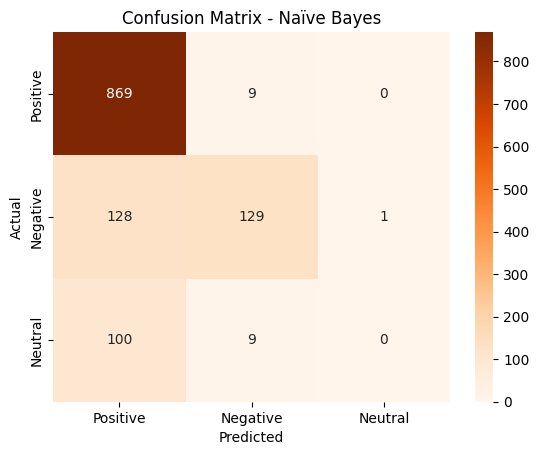

In [ ]:
# 🚀 Huấn luyện mô hình Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# 🚀 Dự đoán
y_val_pred_nb = nb_model.predict(X_val_tfidf)
y_test_pred_nb = nb_model.predict(X_test_tfidf)

# 🚀 Đánh giá mô hình Naïve Bayes
print("\n🎯 Naïve Bayes Validation Accuracy:", accuracy_score(y_val, y_val_pred_nb))
print("🎯 Naïve Bayes Test Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("\n📊 Naïve Bayes Classification Report:")
print(classification_report(y_test, y_test_pred_nb, target_names=LABELS_MAPPING.values()))

# 🚀 Confusion Matrix cho Naïve Bayes
nb_cm = confusion_matrix(y_test, y_test_pred_nb, labels=[0, 1, 2])
sns.heatmap(nb_cm, annot=True, fmt='d', cmap="Oranges", xticklabels=LABELS_MAPPING.values(), yticklabels=LABELS_MAPPING.values())
plt.title('Confusion Matrix - Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




#Logistic



🎯 Logistic Regression Validation Accuracy: 0.8499197431781701
🎯 Logistic Regression Test Accuracy: 0.8489959839357429

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Positive       0.88      0.96      0.92       878
    Negative       0.80      0.76      0.78       258
     Neutral       0.47      0.17      0.26       109

    accuracy                           0.85      1245
   macro avg       0.72      0.63      0.65      1245
weighted avg       0.83      0.85      0.83      1245



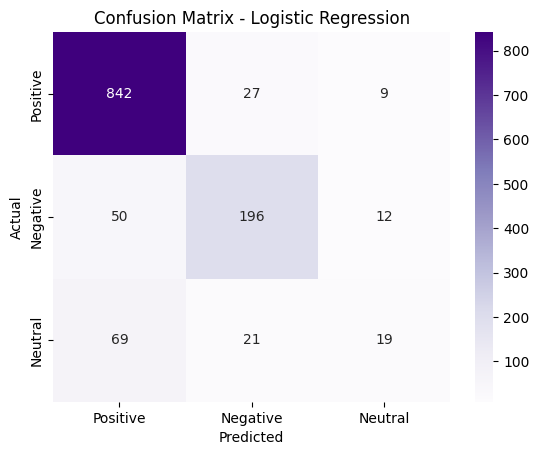

In [ ]:
# 🚀 Huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# 🚀 Dự đoán
y_val_pred_lr = lr_model.predict(X_val_tfidf)
y_test_pred_lr = lr_model.predict(X_test_tfidf)

# 🚀 Đánh giá mô hình Logistic Regression
print("\n🎯 Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("🎯 Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("\n📊 Logistic Regression Classification Report:")
print(classification_report(y_test, y_test_pred_lr, target_names=LABELS_MAPPING.values()))

# 🚀 Confusion Matrix cho Logistic Regression
lr_cm = confusion_matrix(y_test, y_test_pred_lr, labels=[0, 1, 2])
sns.heatmap(lr_cm, annot=True, fmt='d', cmap="Purples", xticklabels=LABELS_MAPPING.values(), yticklabels=LABELS_MAPPING.values())
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Chọn mô hình Logistic Regression
final_model = lr_model

def predict_sentiment(model, text):
    text_cleaned = clean_text(text)  # Tiền xử lý văn bản
    text_tfidf = vectorizer.transform([text_cleaned])  # Chuyển đổi sang TF-IDF
    prediction = model.predict(text_tfidf)[0]  # Dự đoán
    return LABELS_MAPPING[prediction]  # Trả về nhãn tương ứng

# Ví dụ chạy thử
example_texts = [
    "Sản phẩm này rất tuyệt vời, mình cực kỳ hài lòng!",  # Positive
    "Chất lượng kém, không đáng tiền.",  # Negative
    "Dịch vụ khá ổn, không tệ lắm.",  # Neutral
    "Mình cực kỳ thất vọng về sản phẩm này!",  # Negative
    "Thật sự yêu thích cách phục vụ của cửa hàng.",  # Positive
]

print("\n🎭 Kết quả dự đoán cảm xúc với Logistic Regression:")
for text in example_texts:
    print(f"- '{text}' -> {predict_sentiment(final_model, text)}")




🎭 Kết quả dự đoán cảm xúc với Logistic Regression:
- 'Sản phẩm này rất tuyệt vời, mình cực kỳ hài lòng!' -> Positive
- 'Chất lượng kém, không đáng tiền.' -> Negative
- 'Dịch vụ khá ổn, không tệ lắm.' -> Negative
- 'Mình cực kỳ thất vọng về sản phẩm này!' -> Negative
- 'Thật sự yêu thích cách phục vụ của cửa hàng.' -> Positive
